In [1]:
1

1

In [2]:
from datasets.proteins_loader import load_proteins_dataset

train_loader, val_loader, test_loader = load_proteins_dataset(batch_size=32)

for batch in train_loader:
    print(batch)
    break


Processing...


DataBatch(edge_index=[2, 4586], x=[1213, 3], y=[32], batch=[1213], ptr=[33])


Done!


Total Graphs: 1113
PROTEINS(1113)
Graph object structure:
 Data(edge_index=[2, 92], x=[27, 3], y=[1])


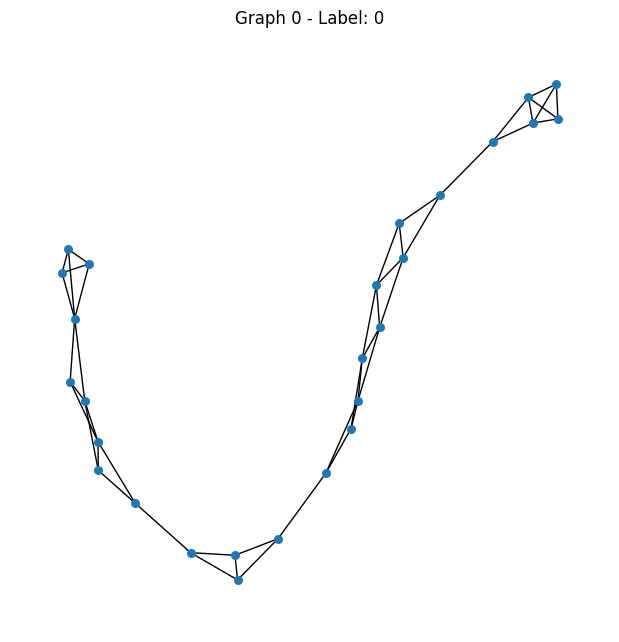

Node feature matrix shape: torch.Size([27, 3])
First 5 node features:
 tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
Graph label: 0 (0: Non-Enzyme, 1: Enzyme)


In [14]:
# ✅ Step 1: Load from pre-processed PyG format
from torch_geometric.datasets import TUDataset
import torch
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# Load the PROTEINS dataset
dataset = TUDataset(root='data/PROTEINS', name='PROTEINS')
print(f"Total Graphs: {len(dataset)}")
print(dataset)

# ✅ Step 2: Pick one sample graph
data = dataset[1]
print("Graph object structure:\n", data)

# ✅ Step 3: Visualize the graph structure
G = to_networkx(data, to_undirected=True)

plt.figure(figsize=(6, 6))
nx.draw(G, node_size=30, with_labels=False)
plt.title(f"Graph 0 - Label: {data.y.item()}")
plt.show()

# ✅ Step 4: Check node features
print("Node feature matrix shape:", data.x.shape)
print("First 5 node features:\n", data.x[:5])

# ✅ Step 5: Class label
print("Graph label:", data.y.item(), "(0: Non-Enzyme, 1: Enzyme)")


C:\Users\Laplace\AppData\Local\Temp\ipykernel_46856\1902755845.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10")


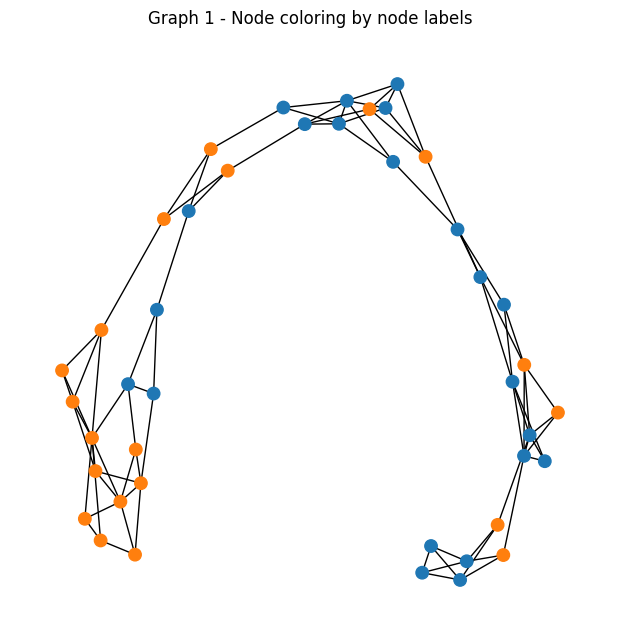

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

# === 1. 读取节点标签 ===
root = 'data/PROTEINS/PROTEINS/raw'
node_labels_path = os.path.join(root, 'PROTEINS_node_labels.txt')
graph_indicator_path = os.path.join(root, 'PROTEINS_graph_indicator.txt')
edge_list_path = os.path.join(root, 'PROTEINS_A.txt')

# 读取每个节点的离散标签（将用于 coloring）
node_labels = np.loadtxt(node_labels_path, dtype=int)
graph_indicator = np.loadtxt(graph_indicator_path, dtype=int)

# 找出第一个图的节点编号范围
first_graph_id = 1
node_indices = np.where(graph_indicator == first_graph_id)[0]

# 读取边列表
edges = np.loadtxt(edge_list_path, delimiter=',', dtype=int) - 1  # shift to 0-based

# 筛选出属于第一个图的边
edges_first_graph = [
    (src, dst)
    for src, dst in edges
    if src in node_indices and dst in node_indices
]

# 构建 NetworkX 图
G = nx.Graph()
G.add_edges_from(edges_first_graph)

# 提取子图中节点对应的 label（用于 coloring）
subgraph_labels = node_labels[node_indices]

# 映射 label 到颜色
cmap = plt.cm.get_cmap("tab10")
colors = [cmap(lbl % 10) for lbl in subgraph_labels]

# === 2. 绘图 ===
plt.figure(figsize=(6, 6))
nx.draw(
    G,
    node_color=colors,
    node_size=80,
    with_labels=False
)
plt.title("Graph 1 - Node coloring by node labels")
plt.show()
